In [268]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.datasets import imdb
from fancyimpute import KNN
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud 
import re,io
from easymoney.money import EasyPeasy 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from statsmodels.graphics.regressionplots import *
from sklearn.preprocessing import PolynomialFeatures 
import statsmodels.formula.api as smf
import math
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
df=pd.read_csv("C:/Users/Owner/Documents/masters_notes/projects/DM/multi_new.csv")

In [6]:
df.isnull().sum()

Title                  0
Year                   0
Rating                 0
Metascore           2779
Votes                  0
Revenue              524
Genre                  0
Time                   0
Director              12
Star                   0
Description            0
Writers                0
Gross                  0
Release                0
Budget                 0
Currency               0
Local_Curr_Value       0
USD_Value              0
dtype: int64

In [7]:
df['Votes']=df['Votes'].replace(r',','', regex=True)

In [8]:
divided_actors=pd.DataFrame(df['Star'].str.rsplit(',').values.tolist())

In [9]:
divided_actors.head(3)

,0,1,2,3
0,['Devrim Evin','Ibrahim Celikkol','Dilek Serbest','Cengiz Coskun']
1,['Shane Carruth','David Sullivan','Casey Gooden','Anand Upadhyaya']
2,['Katie Featherston','Micah Sloat','Mark Fredrichs','Amber Armstrong']


In [10]:
divided_actors[0]=divided_actors[0].map(lambda x: x.lstrip('['']').rstrip(' '' '))

In [11]:
divided_actors[0]=divided_actors[0].str.replace("'", '')

In [12]:
df['actor_1']=divided_actors[0]
df=df.sort_values(by='Director')

In [13]:
df['Gross']=df['Gross'].map(lambda x: x.lstrip('$').rstrip(','))
df=df.reset_index()
df['Director']=df['Director'].str.replace(r"[\"\',]", '')
#df['Director']=df['Director'].map(lambda x: x.lstrip('Directors:').rstrip(', '))

In [14]:
p=df['Release'].str.extract('(([A-Z]\w{0,}))', expand=True)

In [15]:
df['season']=p[0]

In [16]:
df.season.unique()

array(['December', 'June', 'November', 'May', 'August', 'January',
       'March', 'July', 'October', 'September', 'February', 'April',
       'Norway', 'Spain', 'Peru', 'Turkey'], dtype=object)

In [17]:
df=df[df.season != 'Norway']
df=df[df.season != 'Peru']
df=df[df.season != 'Turkey']

In [18]:
df=df[df.season != 'Spain']

In [19]:
df=df.replace({'season' : { 'September':0,'October':0,'November':0,'December':0,'January':1,'February':1,'March':1,'April':2,'May':2,'June':2,'July':3,'August':3}})

In [20]:
df.head(3)

,index,Title,Year,Rating,Metascore,Votes,Revenue,Genre,Time,Director,...,Description,Writers,Gross,Release,Budget,Currency,Local_Curr_Value,USD_Value,actor_1,season
0,4345,Ghajini,-2008,7.3,NaN,53102,$2.43M,"Action, Drama, Mystery",183 min,A.R. Murugadoss,...,A short-term memory loss patient sets out on h...,"['Piyush Mishra', 'A.R. Murugadoss', '2 more c...","38,316,584",24 December 2008 (USA),"INR200,000,000",INR,"200,000,000",200000000,Aamir Khan,0
1,4366,Holiday,-2014,7.2,NaN,23739,$0.71M,"Action, Thriller",160 min,A.R. Murugadoss,...,A military officer uses his intellect and figh...,"['A.R. Murugadoss', 'A.R. Murugadoss', '1 more...","1,390,054",6 June 2014 (India),"INR500,000,000",INR,"500,000,000",500000000,Akshay Kumar,2
2,3730,Thuppakki,-2012,7.8,NaN,21889,NaN,"Action, Thriller",165 min,A.R. Murugadoss,...,An army captain is on a mission to track down ...,"['A.R. Murugadoss', 'A.R. Murugadoss', '1 more...","1,532,283",13 November 2012 (India),[],USD,[],#VALUE!,Joseph Vijay,0


In [208]:
df['Year']=df['Year'].map(lambda x: x.lstrip('-'))

In [209]:
df.to_csv("C:/Users/Owner/Documents/masters_notes/projects/DM/visual.csv")

In [21]:
df1=pd.get_dummies(df['season'])

In [22]:
df1.head(3)

,0,1,2,3
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0


In [23]:
df['season1']=df1[0]
df['season2']=df1[1]
df['season3']=df1[2]
df['season4']=df1[3]

In [24]:
dollar=df[~df['Currency'].isin(['INR','GBP','CNY','CAD','EUR','NOK','KRW','AUD','FRF','DKK','FIM', 'BRL', 'TRL', 'RUR', 'HKD', 'PKR', 'SGD', 'THB',
       'SEK', 'NZD', 'HUF', 'DEM', 'JPY', 'ATS', 'BND'])]

In [25]:
dollar.head(3)

,index,Title,Year,Rating,Metascore,Votes,Revenue,Genre,Time,Director,...,Budget,Currency,Local_Curr_Value,USD_Value,actor_1,season,season1,season2,season3,season4
2,3730,Thuppakki,-2012,7.8,NaN,21889,NaN,"Action, Thriller",165 min,A.R. Murugadoss,...,[],USD,[],#VALUE!,Joseph Vijay,0,1,0,0,0
3,4011,Zero,(III) (2018),5.5,NaN,21468,NaN,"Comedy, Drama, Romance",164 min,Aanand L. Rai,...,[],USD,[],#VALUE!,Shah Rukh Khan,0,1,0,0,0
5,3868,Tanu Weds Manu Returns,-2015,7.7,NaN,24342,NaN,"Comedy, Drama, Romance",128 min,Aanand L. Rai,...,[],USD,[],#VALUE!,Kangana Ranaut,2,0,0,1,0


In [26]:
dollar['Budget']=dollar['Budget'].map(lambda x: x.lstrip('[],$'))

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
dollar['Gross']=dollar['Gross'].str.replace(',','')

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
dollar['Revenue']=dollar['Revenue'].astype(str).map(lambda x: x.lstrip('$').rstrip('M'))
dollar['Revenue']=dollar['Revenue'].astype(str).map(lambda x: x.lstrip('.'))

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
dollar.isnull().sum()

index                  0
Title                  0
Year                   0
Rating                 0
Metascore           2595
Votes                  0
Revenue                0
Genre                  0
Time                   0
Director              10
Star                   0
Description            0
Writers                0
Gross                  0
Release                0
Budget                 0
Currency               0
Local_Curr_Value       0
USD_Value              0
actor_1                0
season                 0
season1                0
season2                0
season3                0
season4                0
dtype: int64

In [30]:
df2=dollar[['Rating','Revenue','Director','Star','Gross','Budget','actor_1','season1','season2','season3','season4']]

In [31]:
df2.columns

Index(['Rating', 'Revenue', 'Director', 'Star', 'Gross', 'Budget', 'actor_1',
       'season1', 'season2', 'season3', 'season4'],
      dtype='object')

In [32]:
df4=df2.dropna()

In [33]:
df4['Gross']=df4['Gross'].str.replace(',','')

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df4['Gross']=df4['Gross'].astype(str).astype(float)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df4['Gross']=df4['Gross'].div(1000000,axis=0)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df4['Budget']=df4['Budget'].str.replace(',','')

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df4['Budget']=pd.to_numeric(df4['Budget'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df4['Budget']=df4['Budget'].div(1000000,axis=0)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df4['Revenue']=df4['Revenue'].astype(str).astype(float)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df4=df4.dropna()

In [41]:
df4.head(4)

,Rating,Revenue,Director,Star,Gross,Budget,actor_1,season1,season2,season3,season4
6,7.0,9.18,Aaron Schneider,"['Robert Duvall', 'Bill Murray', 'Sissy Spacek...",9.695282,7.00,Robert Duvall,0,0,0,1
7,7.4,28.78,Aaron Sorkin,"['Jessica Chastain', 'Idris Elba', 'Kevin Cost...",59.284015,30.00,Jessica Chastain,0,1,0,0
11,6.3,4.63,Abhinav Kashyap,"['Salman Khan', 'Sonakshi Sinha', 'Sonu Sood',...",2.942554,9.37,Salman Khan,1,0,0,0
21,5.7,0.16,Adam Green,"['Kane Hodder', 'Joel David Moore', 'Deon Rich...",0.208550,1.50,Kane Hodder,0,0,1,0


In [42]:
df5=df4.reset_index()

In [43]:
# df4=df4[df4['actor_1']=='Akshay Kumar']

In [44]:
df5['actor_1']=df5['actor_1'].str.replace('"', '')

In [45]:
star1=pd.DataFrame(df5.groupby(['actor_1'])['Gross'].count()).reset_index()

In [46]:
star_count=pd.DataFrame(df5.groupby(['actor_1'])['Revenue'].sum()).reset_index()

In [47]:
star_rank=star_count['Revenue'].div(star1['Gross'],axis=0)

In [48]:
star1['star_rank']=star_rank

In [49]:
star1['Revenue']=star_count['Revenue']

In [50]:
director1=pd.DataFrame(df4.groupby(['Director'])['Gross'].count()).reset_index()

In [51]:
director_count=pd.DataFrame(df4.groupby(['Director'])['Revenue'].sum()).reset_index()

In [52]:
director_rank=director_count['Revenue'].div(director1['Gross'],axis=0)


In [53]:
director1['director_rank']=director_rank

In [54]:
director1['Revenue']=director_count['Revenue']

In [55]:
df5=df4.merge(director1,on='Director',how='left')

In [56]:
df6=df5.merge(star1,on='actor_1',how='left')

In [57]:
df_filled_final1=df6

In [58]:
df6.isnull().sum()

Rating            0
Revenue_x         0
Director          0
Star              0
Gross_x           0
Budget            0
actor_1           0
season1           0
season2           0
season3           0
season4           0
Gross_y           0
director_rank     0
Revenue_y         0
Gross            14
star_rank        14
Revenue          14
dtype: int64

In [59]:
director1.head(3)

,Director,Gross,director_rank,Revenue
0,Aaron Schneider,1,9.18,9.18
1,Aaron Sorkin,1,28.78,28.78
2,Abhinav Kashyap,1,4.63,4.63


In [60]:
star1.head(8)

,actor_1,Gross,star_rank,Revenue
0,50 Cent,1,30.9800,30.98
1,A.J. Cook,1,46.9600,46.96
2,Aaliyah,1,30.3400,30.34
3,Aamir Khan,4,1.5825,6.33
4,Aaron Eckhart,5,33.4680,167.34
5,Aaron Paul,1,43.5800,43.58
6,Aaron Taylor-Johnson,4,81.2325,324.93
7,Abbie Cornish,1,4.4400,4.44


In [61]:
df6.head(3)

,Rating,Revenue_x,Director,Star,Gross_x,Budget,actor_1,season1,season2,season3,season4,Gross_y,director_rank,Revenue_y,Gross,star_rank,Revenue
0,7.0,9.18,Aaron Schneider,"['Robert Duvall', 'Bill Murray', 'Sissy Spacek...",9.695282,7.00,Robert Duvall,0,0,0,1,1,9.18,9.18,1.0,9.180000,9.18
1,7.4,28.78,Aaron Sorkin,"['Jessica Chastain', 'Idris Elba', 'Kevin Cost...",59.284015,30.00,Jessica Chastain,0,1,0,0,1,28.78,28.78,6.0,68.465000,410.79
2,6.3,4.63,Abhinav Kashyap,"['Salman Khan', 'Sonakshi Sinha', 'Sonu Sood',...",2.942554,9.37,Salman Khan,1,0,0,0,1,4.63,4.63,3.0,5.463333,16.39


In [62]:
df7=df6.rename(columns={"Gross_y":"dir_movie_count","Revenue_y":"dir_agg_revenue","director_rank":"Director_rank","Gross":"star_movie_count","Revenue":"star_agg_revenue","Gross_x":"gross","Revenue_x":"revenue","actor_1":'star'})

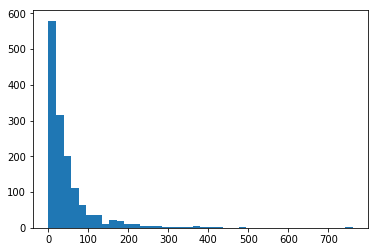

In [63]:
plt.hist(director_rank,bins=40)
plt.show()

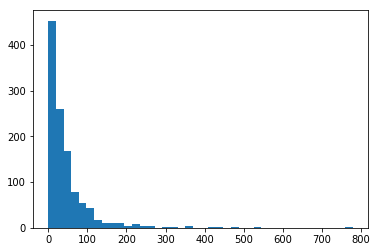

In [64]:
plt.hist(star_rank,bins=40)
plt.show()

In [147]:
star_rank.head(3)

0    30.98
1    46.96
2    30.34
dtype: float64

In [145]:
scaler = preprocessing.StandardScaler()

In [156]:
scaled_df = scaler.fit_transform(star1[['star_rank','Revenue']])


In [159]:
star1['standard_star_rank']=pd.DataFrame(scaled_df)[0]

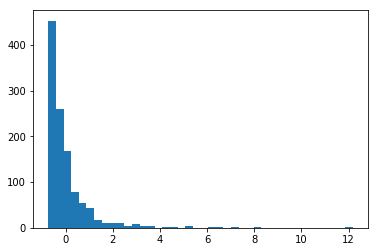

In [160]:
plt.hist(star1['standard_star_rank'],bins=40)
plt.show()

In [65]:
df7.head(6)

,Rating,revenue,Director,Star,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
0,7.0,9.18,Aaron Schneider,"['Robert Duvall', 'Bill Murray', 'Sissy Spacek...",9.695282,7.00,Robert Duvall,0,0,0,1,1,9.180000,9.18,1.0,9.180000,9.18
1,7.4,28.78,Aaron Sorkin,"['Jessica Chastain', 'Idris Elba', 'Kevin Cost...",59.284015,30.00,Jessica Chastain,0,1,0,0,1,28.780000,28.78,6.0,68.465000,410.79
2,6.3,4.63,Abhinav Kashyap,"['Salman Khan', 'Sonakshi Sinha', 'Sonu Sood',...",2.942554,9.37,Salman Khan,1,0,0,0,1,4.630000,4.63,3.0,5.463333,16.39
3,5.7,0.16,Adam Green,"['Kane Hodder', 'Joel David Moore', 'Deon Rich...",0.208550,1.50,Kane Hodder,0,0,1,0,1,0.160000,0.16,2.0,6.640000,13.28
4,7.8,70.26,Adam McKay,"['Christian Bale', 'Steve Carell', 'Ryan Gosli...",133.440870,28.00,Christian Bale,1,0,0,0,7,99.805714,698.64,17.0,107.356471,1825.06
5,6.9,100.47,Adam McKay,"['Will Ferrell', 'John C. Reilly', 'Mary Steen...",128.107642,65.00,Will Ferrell,0,0,0,1,7,99.805714,698.64,21.0,83.409048,1751.59


In [66]:
df7.columns

Index(['Rating', 'revenue', 'Director', 'Star', 'gross', 'Budget', 'star',
       'season1', 'season2', 'season3', 'season4', 'dir_movie_count',
       'Director_rank', 'dir_agg_revenue', 'star_movie_count', 'star_rank',
       'star_agg_revenue'],
      dtype='object')

In [67]:
# dir_pivots = df3.pivot_table(index='Director_rank', columns='Director', values='revenue')


In [68]:
# actor_pivots=df3.pivot_table(index='star_rank', columns='star', values='revenue')

In [69]:
df7.describe()

,Rating,revenue,gross,Budget,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3050.000000,3050.000000,3050.000000
mean,6.439491,57.978456,137.701955,45.439873,0.355091,0.251305,0.222911,0.170692,3.680157,57.978456,264.702725,7.008525,57.866275,497.052666
std,0.962585,81.697693,221.137304,48.704696,0.478619,0.433835,0.416267,0.376301,2.886161,62.737740,380.352415,6.111991,56.640693,644.879839
min,1.600000,0.000000,0.015071,0.000018,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.900000,9.415000,19.320222,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.900000,30.287500,2.000000,23.707500,51.355000
50%,6.500000,31.725000,61.297334,30.000000,0.000000,0.000000,0.000000,0.000000,3.000000,40.092500,113.720000,5.000000,44.832500,235.750000
75%,7.100000,71.372500,155.832344,60.000000,1.000000,1.000000,0.000000,0.000000,5.000000,78.262222,332.590000,10.000000,78.457692,629.430000
max,9.000000,936.660000,2797.800564,356.000000,1.000000,1.000000,1.000000,1.000000,15.000000,760.510000,2281.000000,26.000000,778.420000,4207.450000


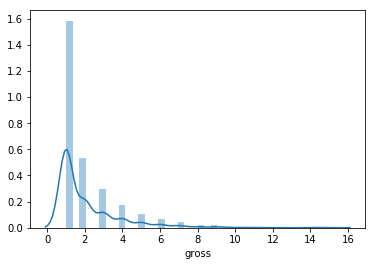

In [70]:
sns.distplot(df7.groupby(['Director'])['gross'].count())

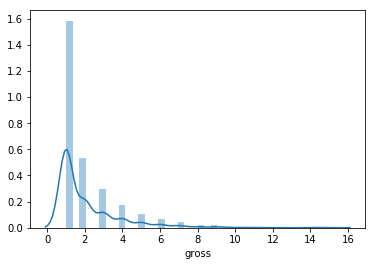

In [71]:
sns.distplot(df7.groupby(['Director'])['gross'].count())

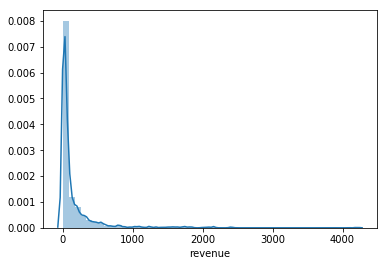

In [72]:
sns.distplot(df7.groupby(['star'])['revenue'].sum())

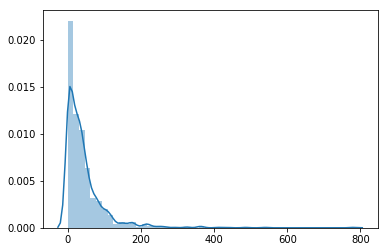

In [73]:
sns.distplot(star_rank)

In [74]:
# sns.distplot(df7.groupby(['season'])['Director'].count())

In [75]:
# sns.distplot(df3.groupby(['season'])['star'].count())

In [76]:
# actor_season=df3.groupby(['star','season'])['rmv'].count().reset_index()

In [77]:
# sns.scatterplot(x=actor_season[actor_season.star=='Aamir Khan']['season'],y=actor_season[actor_season.star=='Aamir Khan']['rmv'])

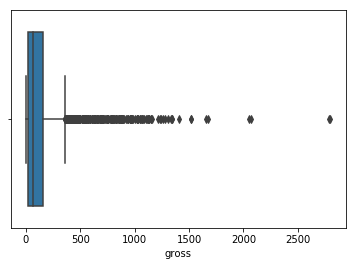

In [78]:
sns.boxplot(df7['gross'])

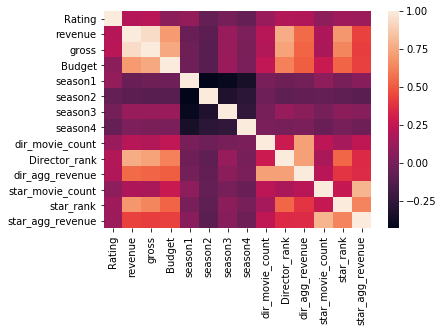

In [79]:
sns.heatmap(df7.corr())

In [80]:
df7.isnull().sum()

Rating               0
revenue              0
Director             0
Star                 0
gross                0
Budget               0
star                 0
season1              0
season2              0
season3              0
season4              0
dir_movie_count      0
Director_rank        0
dir_agg_revenue      0
star_movie_count    14
star_rank           14
star_agg_revenue    14
dtype: int64

In [81]:
df7=df7.dropna()

In [82]:
# plt.scatter(y=df7.groupby(['star'])['revenue'].sum(),x=df3.groupby(['star'])['star_rank'].count())
# plt.show()

In [83]:
# plt.scatter(y=df7.groupby(['Director'])['revenue'].sum(),x=df3.groupby(['Director'])['star_rank'].count())
# plt.show()

In [84]:
df7.head(7)

,Rating,revenue,Director,Star,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
0,7.0,9.18,Aaron Schneider,"['Robert Duvall', 'Bill Murray', 'Sissy Spacek...",9.695282,7.00,Robert Duvall,0,0,0,1,1,9.180000,9.18,1.0,9.180000,9.18
1,7.4,28.78,Aaron Sorkin,"['Jessica Chastain', 'Idris Elba', 'Kevin Cost...",59.284015,30.00,Jessica Chastain,0,1,0,0,1,28.780000,28.78,6.0,68.465000,410.79
2,6.3,4.63,Abhinav Kashyap,"['Salman Khan', 'Sonakshi Sinha', 'Sonu Sood',...",2.942554,9.37,Salman Khan,1,0,0,0,1,4.630000,4.63,3.0,5.463333,16.39
3,5.7,0.16,Adam Green,"['Kane Hodder', 'Joel David Moore', 'Deon Rich...",0.208550,1.50,Kane Hodder,0,0,1,0,1,0.160000,0.16,2.0,6.640000,13.28
4,7.8,70.26,Adam McKay,"['Christian Bale', 'Steve Carell', 'Ryan Gosli...",133.440870,28.00,Christian Bale,1,0,0,0,7,99.805714,698.64,17.0,107.356471,1825.06
5,6.9,100.47,Adam McKay,"['Will Ferrell', 'John C. Reilly', 'Mary Steen...",128.107642,65.00,Will Ferrell,0,0,0,1,7,99.805714,698.64,21.0,83.409048,1751.59
6,7.2,85.29,Adam McKay,"['Will Ferrell', 'Christina Applegate', 'Steve...",90.517748,26.00,Will Ferrell,0,0,0,1,7,99.805714,698.64,21.0,83.409048,1751.59


In [221]:
df7.shape

(3050, 17)

In [222]:
final.shape

(3050, 16)

In [85]:
final=df7.drop(['Star','revenue'],axis=1)

In [86]:
final.isnull().sum()

Rating              0
Director            0
gross               0
Budget              0
star                0
season1             0
season2             0
season3             0
season4             0
dir_movie_count     0
Director_rank       0
dir_agg_revenue     0
star_movie_count    0
star_rank           0
star_agg_revenue    0
dtype: int64

In [87]:
final.dtypes

Rating              float64
Director             object
gross               float64
Budget              float64
star                 object
season1               uint8
season2               uint8
season3               uint8
season4               uint8
dir_movie_count       int64
Director_rank       float64
dir_agg_revenue     float64
star_movie_count    float64
star_rank           float64
star_agg_revenue    float64
dtype: object

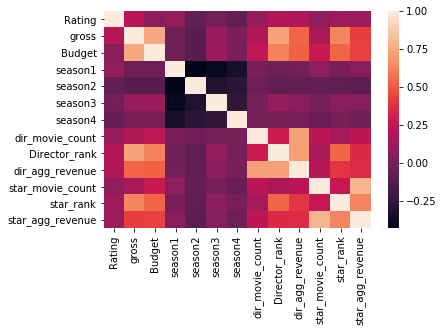

In [88]:
sns.heatmap(final.corr())

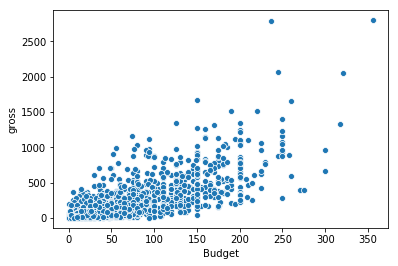

In [89]:
sns.scatterplot(x=final.Budget,y=final.gross)

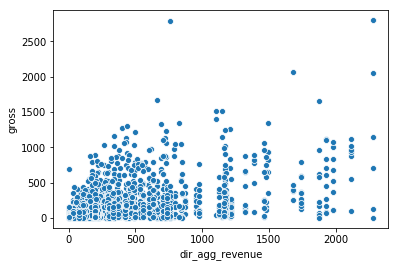

In [90]:
sns.scatterplot(x=final.dir_agg_revenue,y=final.gross)

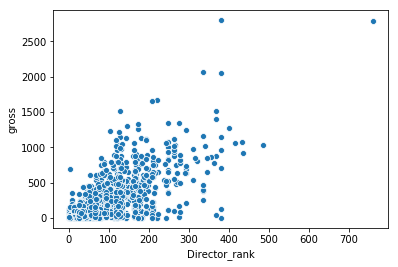

In [91]:
sns.scatterplot(x=final.Director_rank,y=final.gross)

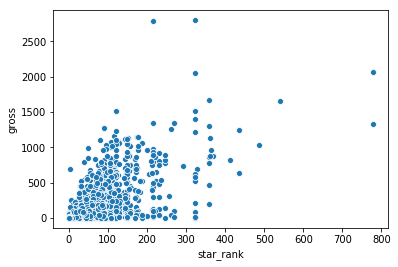

In [92]:
sns.scatterplot(x=final.star_rank,y=final.gross)

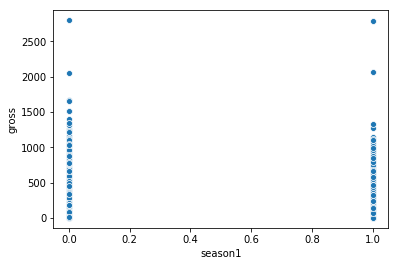

In [93]:
sns.scatterplot(x=final.season1,y=final.gross)

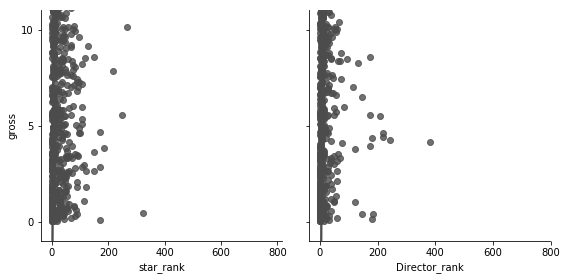

In [94]:
g = sns.PairGrid(final, y_vars=["gross"], x_vars=["star_rank","Director_rank"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

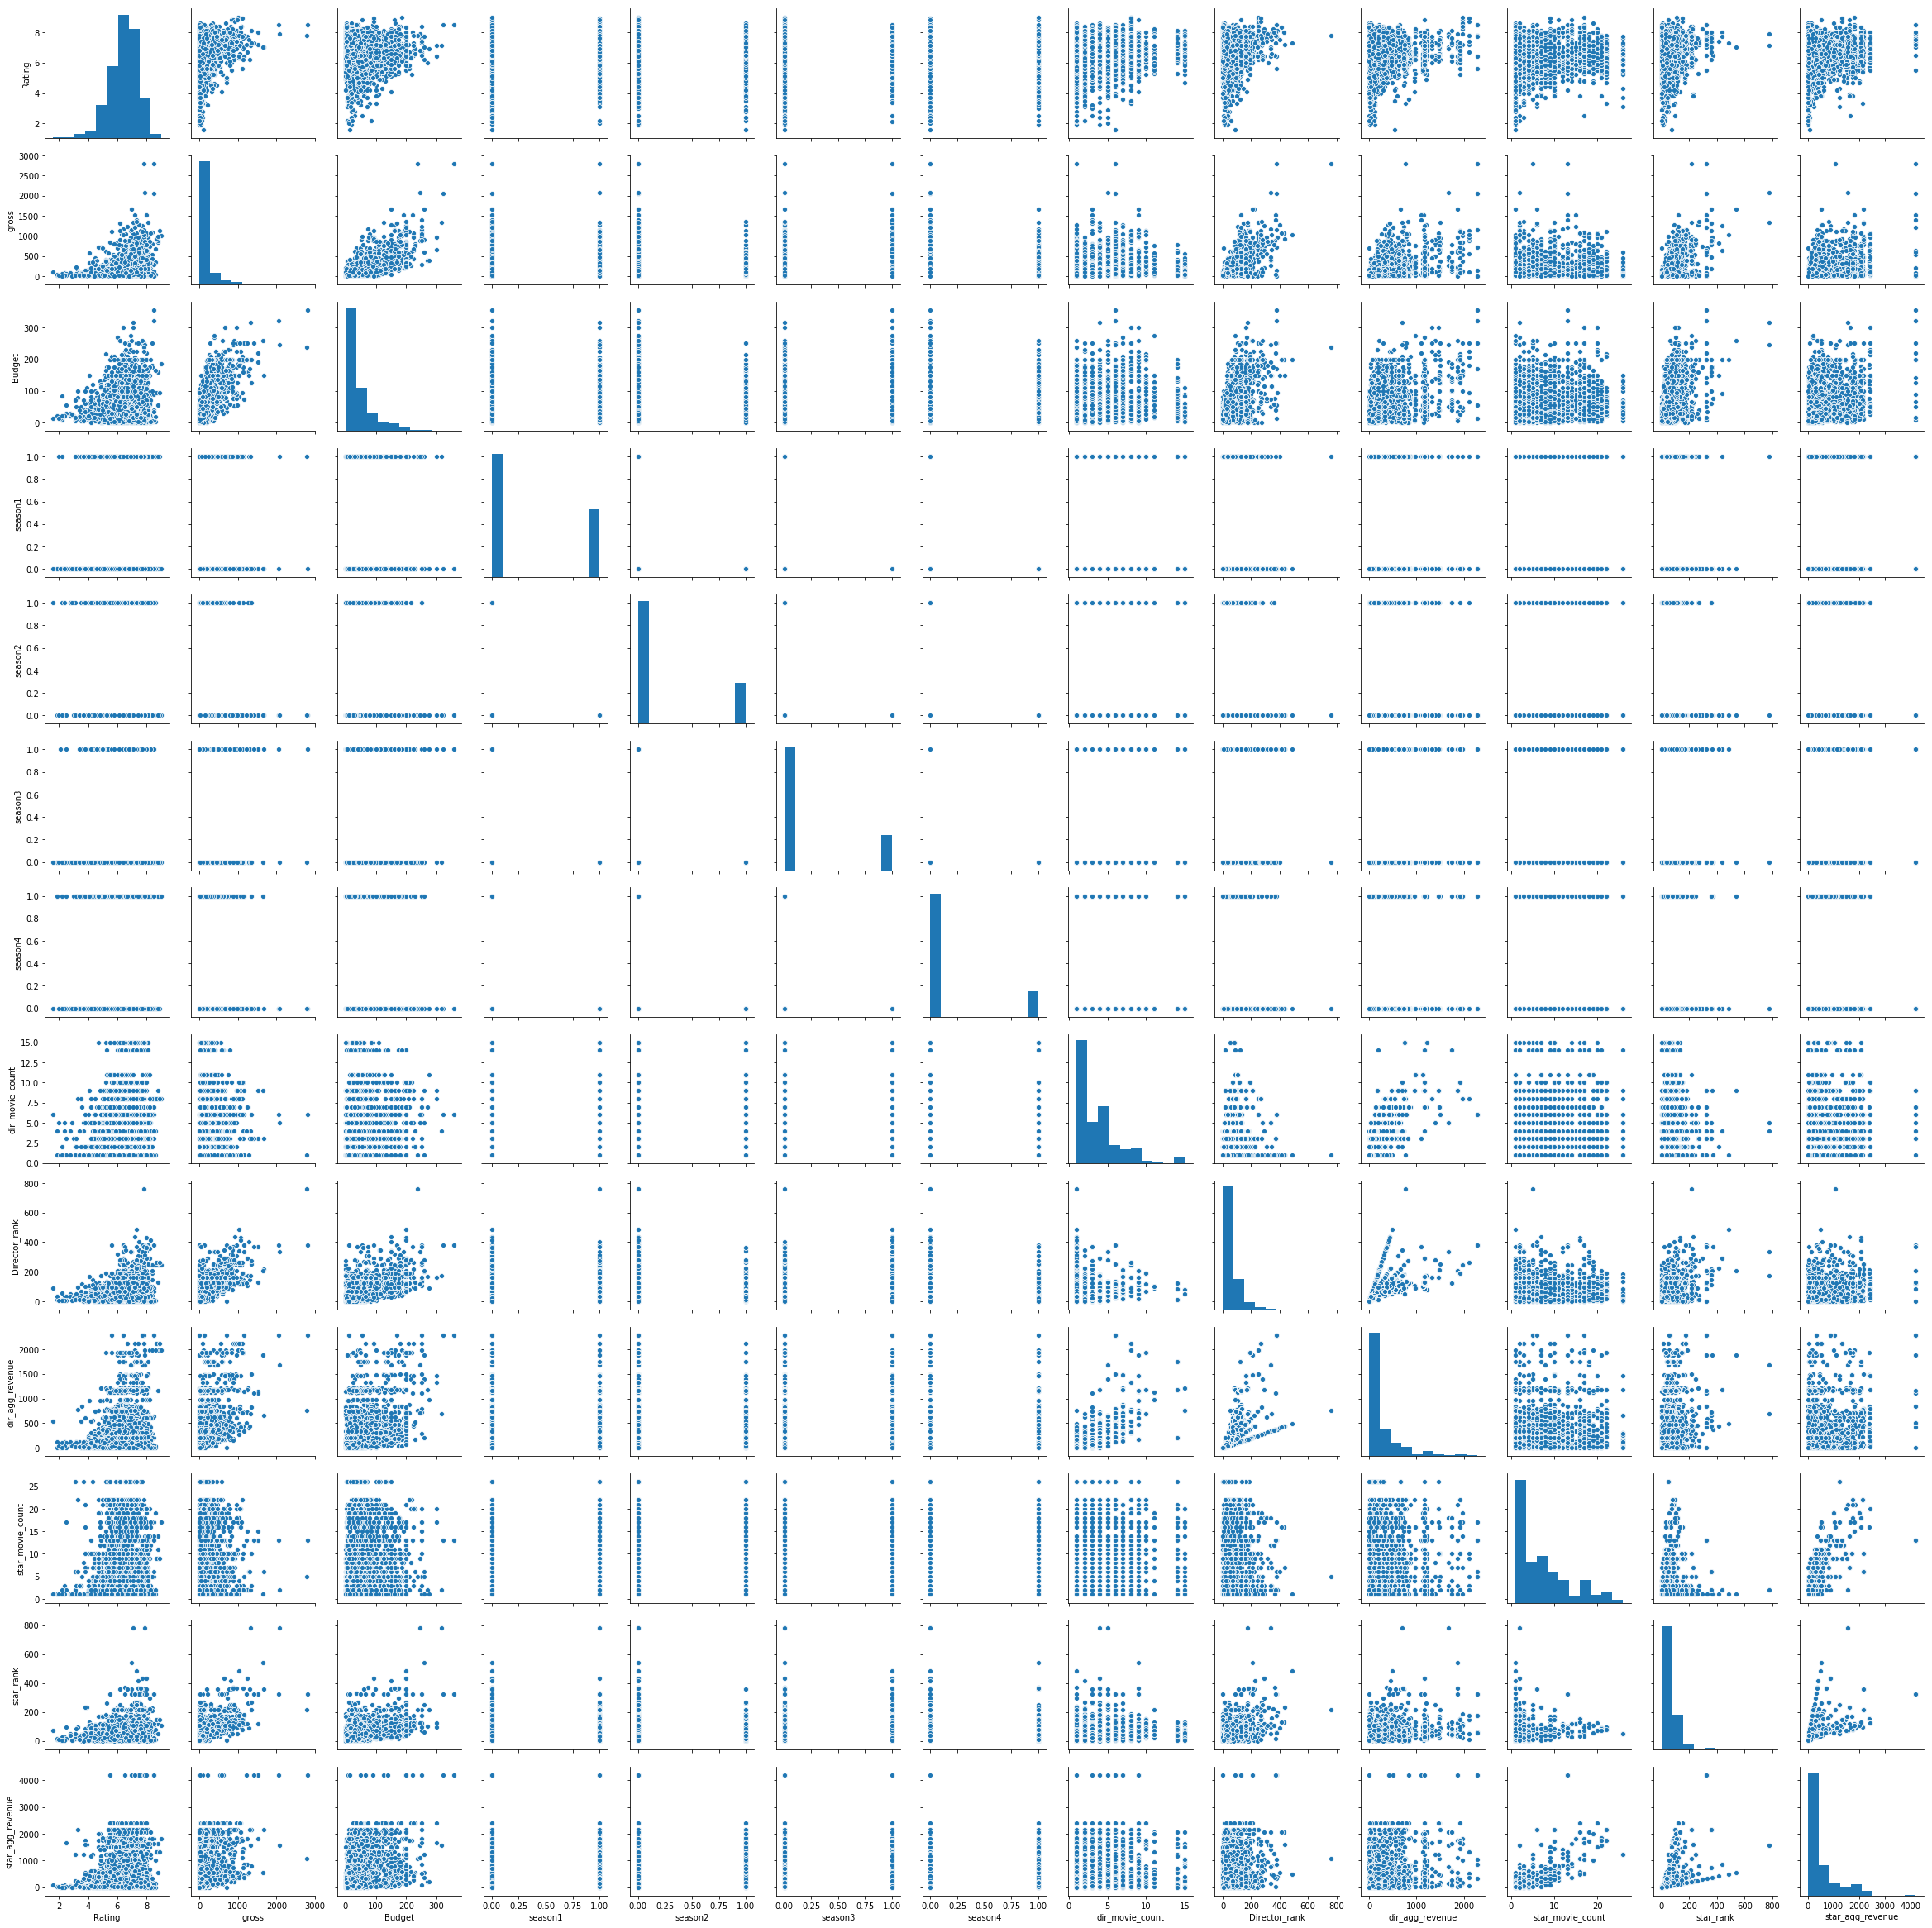

In [95]:
sns.pairplot(final)

In [96]:
final.head(3)

,Rating,Director,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
0,7.0,Aaron Schneider,9.695282,7.00,Robert Duvall,0,0,0,1,1,9.18,9.18,1.0,9.180000,9.18
1,7.4,Aaron Sorkin,59.284015,30.00,Jessica Chastain,0,1,0,0,1,28.78,28.78,6.0,68.465000,410.79
2,6.3,Abhinav Kashyap,2.942554,9.37,Salman Khan,1,0,0,0,1,4.63,4.63,3.0,5.463333,16.39


In [97]:
final.groupby(['season2'])['star'].count()

season2
0    2284
1     766
Name: star, dtype: int64

In [98]:
final.groupby(['star','season2'])['star_rank'].count()

star                      season2
50 Cent                   0           1
A.J. Cook                 1           1
Aaliyah                   1           1
Aamir Khan                0           4
Aaron Eckhart             0           2
                          1           3
Aaron Paul                1           1
Aaron Taylor-Johnson      0           4
Abbie Cornish             0           1
Abraham Attah             0           1
Adam Brody                0           2
Adam Sandler              0          19
                          1           3
Adam Scott                0           1
Adelaide Clemens          0           1
Adewale Akinnuoye-Agbaje  1           1
Adrian Grenier            0           1
Adrien Brody              0           4
                          1           2
Agnes Bruckner            1           1
Al Gore                   0           1
Al Pacino                 0           4
                          1           3
Alan Arkin                0           1
Alan V

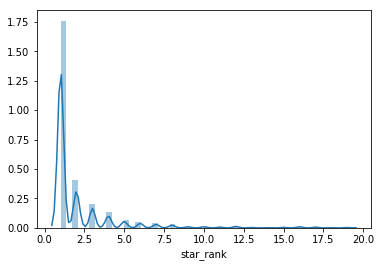

In [99]:
sns.distplot(final.groupby(['star','season2'])['star_rank'].count())


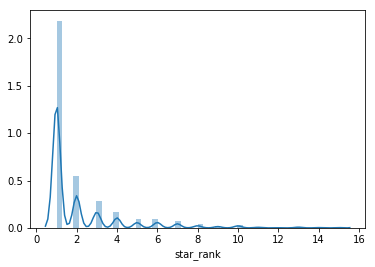

In [100]:
sns.distplot(final.groupby(['star','season1'])['star_rank'].count())

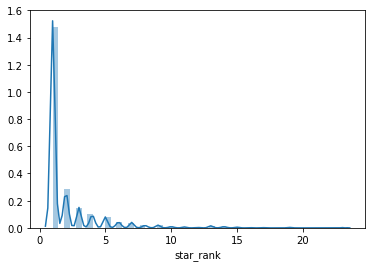

In [101]:
sns.distplot(final.groupby(['star','season3'])['star_rank'].count())

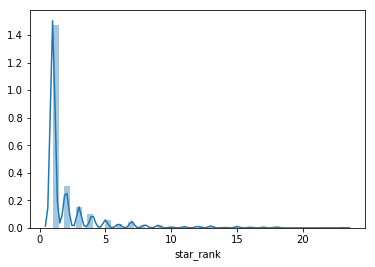

In [102]:
sns.distplot(final.groupby(['star','season4'])['star_rank'].count())

In [103]:
final.shape

(3050, 15)

In [104]:
final=final.reset_index()

In [105]:
final.head(3)

,index,Rating,Director,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
0,0,7.0,Aaron Schneider,9.695282,7.00,Robert Duvall,0,0,0,1,1,9.18,9.18,1.0,9.180000,9.18
1,1,7.4,Aaron Sorkin,59.284015,30.00,Jessica Chastain,0,1,0,0,1,28.78,28.78,6.0,68.465000,410.79
2,2,6.3,Abhinav Kashyap,2.942554,9.37,Salman Khan,1,0,0,0,1,4.63,4.63,3.0,5.463333,16.39


In [106]:
X=final.drop(['dir_agg_revenue','star_agg_revenue','gross','star','Director','index'],axis=1)

In [107]:
X[3040:3050]

,Rating,Budget,season1,season2,season3,season4,dir_movie_count,Director_rank,star_movie_count,star_rank
3040,6.9,80.0,1,0,0,0,8,164.955,4.0,34.910000
3041,7.3,26.0,0,1,0,0,8,164.955,2.0,29.520000
3042,6.5,250.0,0,1,0,0,8,164.955,17.0,97.610000
3043,7.6,130.0,0,1,0,0,8,164.955,2.0,85.295000
3044,6.4,300.0,1,0,0,0,8,164.955,17.0,97.610000
3045,7.7,65.0,0,1,0,0,8,164.955,13.0,53.710000
3046,7.1,225.0,0,0,1,0,8,164.955,4.0,105.937500
3047,6.0,82.0,0,1,0,0,8,164.955,1.0,36.390000
3048,6.8,6.5,0,0,1,0,1,2.270,2.0,1.795000
3049,6.1,10.0,0,0,0,1,1,0.000,9.0,147.935556


In [108]:
y=final[['gross']]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=50)

In [110]:
linear=LinearRegression()
linear.fit(x_train,y_train)
pred1 = linear.predict(x_test)

In [111]:
print(explained_variance_score(y_test, pred1))
print('mean absolute error: {:.2f}'.format(metrics.mean_squared_error(y_test,pred1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

0.7190535056914209
mean absolute error: 13144.95
RMSE: 114.65143413068846


In [112]:
y_test.head(3)

,gross
2519,114.908830
2901,64.191523
2028,752.600867


In [113]:
pred1

array([[115.31056077],
       [134.99595451],
       [580.02624629],
       ...,
       [ 81.8674305 ],
       [371.00621265],
       [160.26616773]])

In [132]:
linear.coef_

array([[24.37228231,  2.0831008 , -3.68622381, -6.34967919,  4.20942902,
         5.82647398, -3.31457698,  1.25357925, -2.30304848,  0.75101934]])

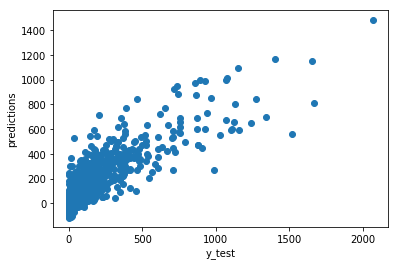

In [133]:
plt.scatter(y_test,pred1)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

In [115]:
model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     942.4
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:33:35   Log-Likelihood:                -18764.
No. Observations:                3050   AIC:                         3.755e+04
Df Residuals:                    3040   BIC:                         3.761e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rating              22.2620      2.210  

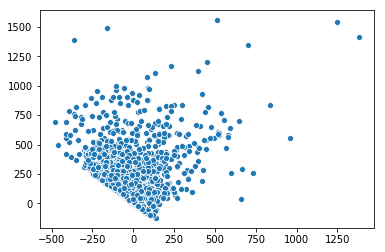

In [218]:
sns.scatterplot(x=model.resid,y=predictions)

In [134]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     942.4
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:33:35   Log-Likelihood:                -18764.
No. Observations:                3050   AIC:                         3.755e+04
Df Residuals:                    3040   BIC:                         3.761e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rating              22.2620      2.210  

Text(0.5, 0, 'Normalized residuals')

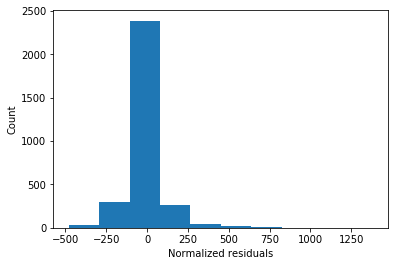

In [116]:
plt.hist(model.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

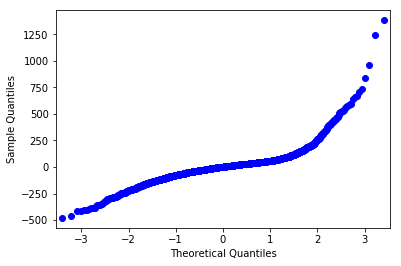

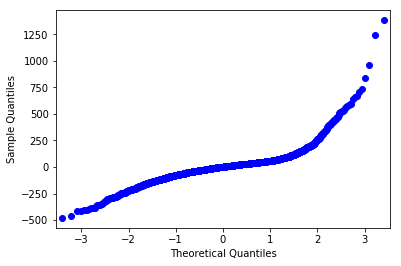

In [117]:
sm.qqplot(model.resid)

<StemContainer object of 3 artists>

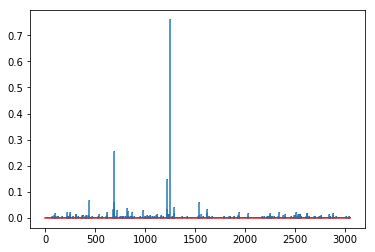

In [118]:
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

In [144]:
np.arange(len(c))

0.11451966686277365

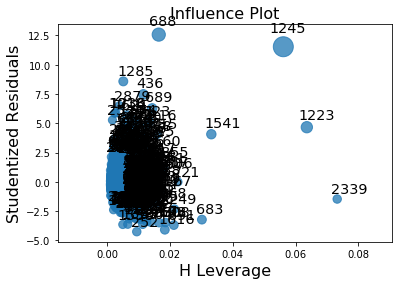

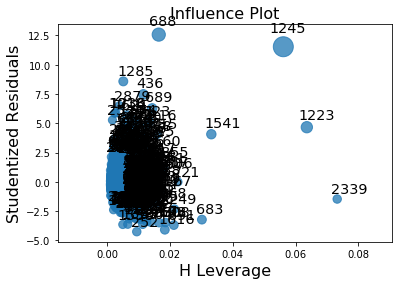

In [119]:
influence_plot(model,size=20)

In [120]:
influence = model.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

Leverage v.s. Studentized Residuals


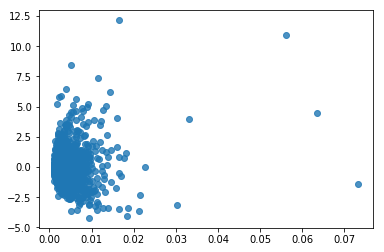

In [121]:
print('Leverage v.s. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)

In [122]:
crime1res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
crime1res = pd.concat([X, crime1res], axis = 1)

In [137]:
r = crime1res.resid_student
#print(r.describe())
r_sort = crime1res.sort_values(by = 'resid_student')
print("top 5 most negative residuals",r_sort.head(3))

top 5 most negative residuals       Rating  Budget  season1  season2  season3  season4  dir_movie_count  \
252      6.4   190.0        0        0        1        0                4   
1616     7.8    39.0        1        0        0        0                3   
691      6.4    12.0        1        0        0        0                6   

      Director_rank  star_movie_count  star_rank     cooks    dffits  \
252      293.215000              17.0  61.446471  0.017134 -0.415093   
1616     369.266667               2.0  16.640000  0.031057 -0.558726   
691      380.166667              17.0  61.446471  0.029360 -0.542971   

      leverage  resid_student  
252   0.009449      -4.249914  
1616  0.018378      -4.083346  
691   0.021243      -3.685589  


In [136]:
print("top 5 most positive residuals", r_sort.tail(3))

top 5 most positive residuals       Rating  Budget  season1  season2  season3  season4  dir_movie_count  \
1285     7.2   190.0        0        0        1        0                9   
1245     7.8   237.0        1        0        0        0                1   
688      8.5   356.0        0        0        1        0                6   

      Director_rank  star_movie_count   star_rank     cooks    dffits  \
1285     127.542222              15.0  120.284667  0.037273  0.617758   
1245     760.510000               5.0  216.668000  0.757412  2.811221   
688      380.166667              13.0  323.650000  0.251039  1.624801   

      leverage  resid_student  
1285  0.005163       8.575524  
1245  0.056093      11.532043  
688   0.016442      12.566904  


In [124]:
leverage = crime1res.leverage
print(leverage.describe())
leverage_sort = crime1res.sort_values(by = 'leverage', ascending = False)
print(leverage_sort.head())

count    3050.000000
mean        0.003279
std         0.003014
min         0.001032
25%         0.001954
50%         0.002496
75%         0.003563
max         0.073241
Name: leverage, dtype: float64
      Rating  Budget  season1  season2  season3  season4  dir_movie_count  \
2339     7.1   317.0        1        0        0        0                4   
1223     7.9   245.0        1        0        0        0                5   
1245     7.8   237.0        1        0        0        0                1   
1541     7.0   260.0        0        0        0        1                9   
683      7.3   200.0        0        0        1        0                1   

      Director_rank  star_movie_count  star_rank     cooks    dffits  \
2339     173.062500               2.0    778.420  0.016924 -0.411460   
1223     336.840000               2.0    778.420  0.146761  1.215579   
1245     760.510000               5.0    216.668  0.757412  2.811221   
1541     208.196667               1.0    540.080  

In [125]:
crime1res[abs(crime1res.dffits) > 2 * math.sqrt(3.0 / 51)]

,Rating,Budget,season1,season2,season3,season4,dir_movie_count,Director_rank,star_movie_count,star_rank,cooks,dffits,leverage,resid_student
436,7.0,150.0,0,0,1,0,3,220.166667,6.0,359.425000,0.063934,0.806757,0.011539,7.466729
683,7.3,200.0,0,0,1,0,1,486.300000,1.0,486.300000,0.032175,-0.568108,0.030178,-3.220552
688,8.5,356.0,0,0,1,0,6,380.166667,13.0,323.650000,0.251039,1.624801,0.016442,12.566904
689,8.5,321.0,0,0,1,0,6,380.166667,13.0,323.650000,0.056617,0.757181,0.014343,6.276834
691,6.4,12.0,1,0,0,0,6,380.166667,17.0,61.446471,0.029360,-0.542971,0.021243,-3.685589
715,7.5,150.0,1,0,0,0,1,400.740000,6.0,90.976667,0.026643,0.517480,0.015956,4.063850
823,6.4,74.0,0,0,0,1,1,336.050000,12.0,117.159167,0.035761,0.600501,0.013462,5.140537
974,6.7,250.0,0,0,1,0,7,104.101429,15.0,120.284667,0.025155,0.503752,0.009059,5.268719
1216,6.2,170.0,0,0,1,0,3,146.823333,6.0,359.425000,0.029041,0.540841,0.012587,4.790335
1223,7.9,245.0,1,0,0,0,5,336.840000,2.0,778.420000,0.146761,1.215579,0.063577,4.665201


In [126]:
X1=X.drop(X.index[[252,1616,1245,688]])

In [127]:
y1=y.drop(y.index[[252,1616,1245,688]])

In [128]:
model_1 = sm.OLS(y1, X1.astype(float)).fit()
predictions_1 = model_1.predict(X1) 
print_model1 = model_1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     952.1
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:34:05   Log-Likelihood:                -18577.
No. Observations:                3046   AIC:                         3.717e+04
Df Residuals:                    3036   BIC:                         3.723e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rating              21.8365      2.096  

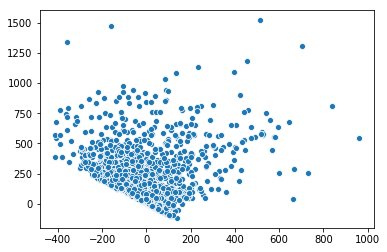

In [220]:
sns.scatterplot(x=model.resid,y=predictions_1)

In [129]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.4,random_state=50)

In [130]:
linear1=LinearRegression()
linear1.fit(x_train1,y_train1)
pred11 = linear1.predict(x_test1)

In [138]:
print(explained_variance_score(y_test1, pred11))
print('mean absolute error: {:.2f}'.format(metrics.mean_squared_error(y_test1,pred11)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1,pred11)))

0.7455455341603008
mean absolute error: 10763.20
RMSE: 103.74583262722629


In [ ]:
plt.scatter(y_test1,pred11)

In [ ]:
plt.scatter(y_test,pred1)

In [170]:
final[1245:1246]

,index,Rating,Director,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
1245,1250,7.8,James Cameron,2789.968301,237.0,Sam Worthington,1,0,0,0,1,760.51,760.51,5.0,216.668,1083.34


In [224]:
final.head(3)

,index,Rating,Director,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue
0,0,7.0,Aaron Schneider,9.695282,7.00,Robert Duvall,0,0,0,1,1,9.18,9.18,1.0,9.180000,9.18
1,1,7.4,Aaron Sorkin,59.284015,30.00,Jessica Chastain,0,1,0,0,1,28.78,28.78,6.0,68.465000,410.79
2,2,6.3,Abhinav Kashyap,2.942554,9.37,Salman Khan,1,0,0,0,1,4.63,4.63,3.0,5.463333,16.39


In [225]:
final_logit=final

In [227]:
final_logit['revenue']=df7['revenue']

In [229]:
profitability=(final_logit['gross']-final_logit['Budget']).div(final_logit['Budget'])

In [233]:
final_logit['profit']=profitability

In [239]:
final_logit.shape

(3050, 18)

In [236]:
X_logit=final_logit.drop(['dir_agg_revenue','star_agg_revenue','gross','star','Director','index','revenue'],axis=1)

In [240]:
X_logit.shape

(3050, 11)

In [237]:
y_logit=final_logit[['profit']]

In [243]:
y_logit.shape

(3050, 1)

In [252]:
y1_cat = np.where(y_logit > y_logit.median() , 0, 
                                 np.where(y_logit < y_logit.median(), 1, '2'))

In [254]:
y1_cat.shape

(3050, 1)

In [261]:
pd.DataFrame(y1_cat)[0].value_counts()

0    1525
1    1525
Name: 0, dtype: int64

In [255]:
x_train12,x_test12,y_train12,y_test12=train_test_split(X_logit,y1_cat,test_size=0.4,random_state=50)

In [256]:
logit=LogisticRegression()


In [257]:
logit.fit(x_train12,y_train12)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [258]:
logit_predict=logit.predict(x_test12)

In [259]:
accuracy_score(y_test12,logit_predict)

0.9827868852459016

In [262]:
pd.DataFrame(logit_predict)[688:689]

,0
688,1


In [263]:
final[688:689]

,index,Rating,Director,gross,Budget,star,season1,season2,season3,season4,dir_movie_count,Director_rank,dir_agg_revenue,star_movie_count,star_rank,star_agg_revenue,revenue,profit
688,690,8.5,Directors:Anthony Russo Joe Russo,2797.800564,356.0,Robert Downey Jr.,0,0,1,0,6,380.166667,2281.0,13.0,323.65,4207.45,6.35,6.85899


In [266]:
print(classification_report(y_test12, logit_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       610
           1       0.98      0.99      0.98       610

    accuracy                           0.98      1220
   macro avg       0.98      0.98      0.98      1220
weighted avg       0.98      0.98      0.98      1220



In [282]:
probs = logit.predict_proba(x_test12)

In [283]:
probs = probs[:, 1]

In [285]:
auc = roc_auc_score(y_test12, probs)
print('AUC: %.2f' % auc)

AUC: 1.00


In [290]:
fpr, tpr, thresholds = roc_curve(pd.to_numeric(y_test), probs)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
polynomial_regression = PolynomialFeatures(degree=2)
X_polynomial1 = polynomial_regression.fit_transform(X1)
lin_reg_21 = LinearRegression()

In [ ]:
lin_reg_21.fit(X_polynomial1, y1)
y_pred1 = lin_reg_21.predict(X_polynomial1)

In [ ]:
print(metrics.r2_score(y1, y_pred1))

In [ ]:
print(explained_variance_score(y1, y_pred1))

In [ ]:
#sns.scatterplot(x=lin_reg_2.resid,y=y_pred)